In [125]:
import os
import numpy as np
import cv2 as cv
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
from skimage.util import invert
import PIL.Image as pilimg
from plantcv import plantcv as pcv
import seaborn as sns

In [126]:
exp_img_path = '/home/jovyan/work/hangman/dataset/crack_segmentation_dataset/masks/DeepCrack_11301-4.jpg'

# image read
im = cv.imread(exp_img_path, cv.IMREAD_GRAYSCALE)
pix = im/255
pix = np.where(pix>0.5,255,0)
pix = pix.astype(np.uint8)

# skeleton
skeleton = pcv.morphology.skeletonize(mask=pix)

# prune
pruned, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=123456789)

In [127]:
# distance transform
dist_transform = cv.distanceTransform(pix, cv.DIST_L2, 5)
# points selection
result = dist_transform * ((pruned/255).astype(np.uint8))

In [ ]:
# visualization
fig, ax = plt.subplots(figsize=(400,400))

ax.matshow(result, cmap=plt.cm.Reds)
ax.matshow(pix, cmap='gray', alpha=0.5)

for i in range(448):
    for j in range(448):
        if result[j,i] == 0.0:
            continue
        c = result[j,i]
        ax.text(i, j, str(round(c, 2)), va='center', ha='center', fontsize=12)

# Save the full figure...
fig.savefig('test.png')

In [128]:
test = test[np.nonzero(test)]
test = test * 2

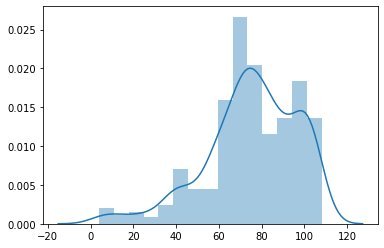

In [129]:
sns.distplot(test)
plt.show()

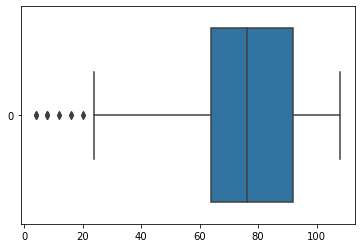

The max range of crack width: 108
The 75 percentile of crack width: 92.0


In [130]:
sns.boxplot(orient='h', data=test)
plt.show()

print('The max range of crack width:',np.max(test))
print('The 75 percentile of crack width:',np.percentile(test, 75))

# Task

In [131]:
img_path = 'test_results/exp16/pred'
img_list = ['CFD_100.jpg', 'cracktree200_6221.jpg', 'cracktree200_6711.jpg',
            'DeepCrack_7Q3A9064-1.jpg', 'DeepCrack_11139.jpg', 'DeepCrack_11169-1.jpg']
truth_width = [13.0, 2.0, 2.24, 11.05, 25.0, 2.0]


for img in img_list:
    # image read
    im = cv.imread(os.path.join(img_path, img), cv.IMREAD_GRAYSCALE)
    pix = im/255
    pix = np.where(pix>0.5,255,0)
    pix = pix.astype(np.uint8)

    # skeleton
    skeleton = pcv.morphology.skeletonize(mask=pix)

    # prune
    pruned, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=123456789)
    
    # distance transform
    dist_transform = cv.distanceTransform(pix, cv.DIST_L2, 5)
    
    # points selection
    result = dist_transform * ((pruned/255).astype(np.uint8))
    
    # width from center
    result = result * 2
    
    # keep the nonzero values
    result = result[np.nonzero(result)]
    result.sort()
    
    print(img)
    print(result[-5:])

CFD_100.jpg
[6.3938   6.3938   8.7876   9.993799 9.993799]
cracktree200_6221.jpg
[2. 2. 2. 2. 2.]
cracktree200_6711.jpg
[2. 2. 2. 2. 2.]
DeepCrack_7Q3A9064-1.jpg
[10. 10. 12. 14.]
DeepCrack_11139.jpg
[15.181399 15.5938   16.       16.       16.393799]
DeepCrack_11169-1.jpg
[14.3938   14.7876   14.7876   15.181399 16.393799]


# Crack width category

In [206]:
import os
import numpy as np
import cv2 as cv
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
from skimage.util import invert
import PIL.Image as pilimg
from plantcv import plantcv as pcv
import seaborn as sns
import random


# image, mask load
image_path = '/home/jovyan/work/hangman/dataset/crack_segmentation_dataset/images'
mask_path = '/home/jovyan/work/hangman/dataset/crack_segmentation_dataset/masks'

image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image for image in image_list if image.endswith('.jpg')]
mask_list = [mask for mask in mask_list if mask.endswith('.jpg')]
image_list = [image for image in image_list if not image.startswith('noncrack')]
mask_list = [mask for mask in mask_list if not mask.startswith('noncrack')]
random.shuffle(image_list)

# max width calculatiton
def max_width(img_path):
    # image read
    im = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    pix = im/255
    pix = np.where(pix>0.5,255,0)
    pix = pix.astype(np.uint8)

    # skeleton
    skeleton = pcv.morphology.skeletonize(mask=pix)

    # prune
    pruned, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=100)

    # distance transform
    dist_transform = cv.distanceTransform(pix, cv.DIST_L2, 5)
    
    # points selection
    result = dist_transform * ((pruned/255).astype(np.uint8))
    
    # width from center
    result = result * 2
    
    # keep the nonzero values
    result = result[np.nonzero(result)]
    
    # if the result is null
    if result.size == 0:
        return 0
    result = np.round(result, 2)
    
    return np.max(result)

# image show
def img_show(img_path):
    im = pilimg.open(img_path)
    pix = np.array(im)
    plt.figure()
    plt.axis('off')
    plt.imshow(pix)

In [ ]:
dist = np.array([])
for idx in range(len(image_list)):
    mask = os.path.join(mask_path, image_list[idx])
    max_value = max_width(mask)
    if max_value is not 0:
        dist = np.append(dist, np.array([max_value]))

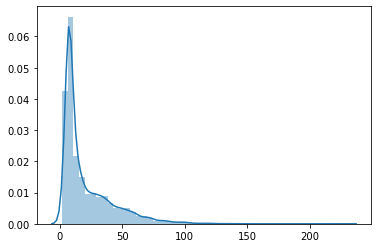

In [190]:
sns.distplot(dist)
plt.show()

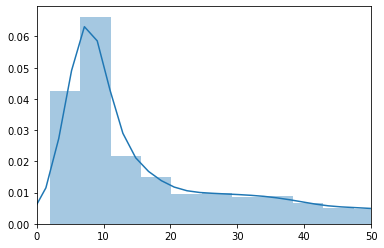

In [189]:
sns.distplot(dist)
plt.xlim(0, 50)
plt.show()

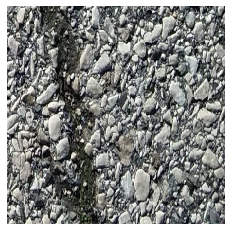

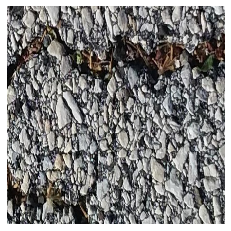

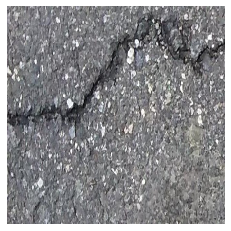

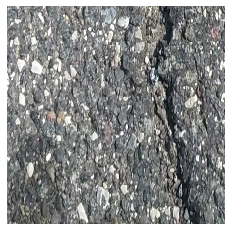

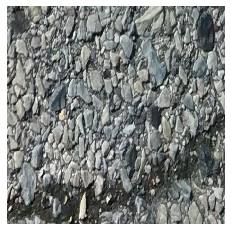

In [207]:
cnt = 1
for idx in range(len(image_list)):
    mask = os.path.join(mask_path, image_list[idx])
    max_value = max_width(mask)
    if max_value >= 50:
        img = os.path.join(image_path, image_list[idx])
        img_show(img)
        cnt += 1
    if cnt > 5:
        break